In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
k=pd.read_csv(r'/content/gdrive/My Drive/appstore_games.csv')
m=pd.DataFrame(k)
m

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17002,https://apps.apple.com/us/app/stack-puzzle-ris...,1474626442,Stack Puzzle : Rise Tower,"Blast the cubes, solve puzzle!",https://is5-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,"The goal is very simple, move the square horiz...",Zhigang Pei,4+,EN,64795648.0,Games,"Games, Entertainment, Casual, Strategy",30/07/2019,30/07/2019
17003,https://apps.apple.com/us/app/eachother/id1474...,1474919257,EachOther,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,Collect a score while you play!!\n\nBy linking...,Sultan Shindi,4+,EN,110341120.0,Games,"Games, Family, Strategy",1/08/2019,1/08/2019
17004,https://apps.apple.com/us/app/rabbit-vs-tortoi...,1474962324,Rabbit Vs Tortoise,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,"""Rabbit Vs Tortoise is chess type cool simple ...",Vishal Baldha,4+,EN,23207936.0,Games,"Games, Strategy",3/08/2019,3/08/2019
17005,https://apps.apple.com/us/app/fatall/id1474963671,1474963671,FaTaLL,Most fun game!!!,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,"9.99, 49.99, 3.99",Upgrade your character and use your skills to ...,Tayrem Games,4+,EN,196750336.0,Games,"Games, Strategy, Action",1/08/2019,1/08/2019


In [ ]:
print(m.columns)

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'Average User Rating',
       'User Rating Count', 'Price', 'In-app Purchases', 'Description',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')


In [ ]:
print(m['Average User Rating'].isnull())
print(m['Average User Rating'].isnull().sum())

0        False
1        False
2        False
3        False
4        False
         ...  
17002     True
17003     True
17004     True
17005     True
17006     True
Name: Average User Rating, Length: 17007, dtype: bool
9446


In [ ]:
m=m.dropna(subset=['User Rating Count'])
print(m['User Rating Count'].isnull())
print(m['User Rating Count'].isnull().sum())

0        False
1        False
2        False
3        False
4        False
         ...  
16950    False
16956    False
16962    False
16967    False
16993    False
Name: User Rating Count, Length: 7561, dtype: bool
0


In [ ]:
print(m['User Rating Count'].isnull())
print(m['User Rating Count'].isnull().sum())

0        False
1        False
2        False
3        False
4        False
         ...  
16950    False
16956    False
16962    False
16967    False
16993    False
Name: User Rating Count, Length: 7561, dtype: bool
0


In [ ]:
m.sort_values(by=['Average User Rating'],ascending=False)

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
16993,https://apps.apple.com/us/app/agadmator-chess-...,1474461379,Agadmator Chess Clock,Simple & elegant chess clock,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,5.0,33.0,0.00,NaN,"Agadmator Chess Clock is a beautiful, lightwei...",Ivan Amidzic,4+,EN,8845312.0,Games,"Games, Strategy, Board, Utilities",30/07/2019,30/07/2019
2733,https://apps.apple.com/us/app/optical-inquisit...,720825227,Optical Inquisitor 17+,A Retro Sniper Adventure,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,5.0,12416.0,0.99,NaN,"""Its the year 1988. Acid wash jeans are in.\nO...",Crescent Moon Games,17+,"CS, NL, EN, FR, DE, IT, JA, KO, PL, PT, RU, ZH...",70558720.0,Games,"Games, Strategy, Entertainment, Casual",24/10/2013,13/09/2017
12034,https://apps.apple.com/us/app/watermelon-evolu...,1249069499,Watermelon Evolution Food Clicker,become billionaire!,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,5.0,78.0,0.00,"4.99, 1.99, 1.99, 0.99, 8.99, 14.99, 3.99, 17....","""Find out what happens to an watermelon food e...",Evolution Games GmbH,4+,EN,188539904.0,Games,"Games, Entertainment, Family, Strategy",20/06/2017,20/06/2017
2730,https://apps.apple.com/us/app/rush-for-gold-al...,720681700,Rush for gold: Alaska,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,5.0,172.0,0.00,2.99,Who says the time of the great gold prospector...,Viktor Nikulin,4+,"EN, FR, DE, JA, RU, ES",246345728.0,Games,"Games, Family, Strategy",21/10/2013,3/10/2017
12051,https://apps.apple.com/us/app/jeans-sundaeria-...,1249893606,"""Jean's Sundaeria : Tap Dash""",Idle Clicker Game,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,5.0,8.0,0.00,0.99,"""Jean's Sundaeria : Tap Dash is an idle clicke...","AFEEL, Inc.",4+,"EN, KO",44268544.0,Games,"Games, Simulation, Strategy",17/07/2017,11/12/2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5572,https://apps.apple.com/us/app/venture-for-ipad...,969107262,Venture for iPad,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,1.0,5.0,2.99,NaN,The object of Venture is to acquire the most m...,"Sandy Knoll Software, LLC",4+,EN,10634240.0,Games,"Games, Board, Entertainment, Strategy",9/03/2015,25/10/2017
6103,https://apps.apple.com/us/app/escape-mystery-h...,993863316,Escape Mystery Haunted House -Scary Point & Cl...,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,1.0,7.0,1.99,NaN,"This scary house has monsters, riddles and dif...",One Connection Media,12+,"EN, FR, DE, IT, JA, RU, ZH, ES, ZH, TR",57376768.0,Games,"Games, Strategy, Entertainment, Simulation",18/07/2015,12/08/2015
541,https://apps.apple.com/us/app/easy-chess/id412...,412502748,Easy Chess,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,1.0,15.0,0.00,NaN,"When it comes to mind games, chess is undoubte...",willie shi,4+,EN,409570.0,Games,"Games, Entertainment, Board, Strategy",5/01/2011,14/02/2013
1957,https://apps.apple.com/us/app/north-south-the-...,601301449,NORTH & SOUTH - The Game (Pocket Edition),NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,1.0,7.0,1.99,NaN,RELIVE THE NORTH& SOUTH CULT GAME REMODELED! \...,HandyGames,9+,EN,334925824.0,Games,"Games, Casual, Strategy",30/04/2013,20/06/2013


In [ ]:
def strat(x):
  o=0
  i=0
  a=[]
  r=''
  x=x.replace(" ",'')
  fields=['Action','Entertainment','Simulation','Puzzle','Family','Card','Board']
  
  
  while i<len(x):
    if x[i]==',':
      a.append(x[o:i])
      o=i+1
    elif i==(len(x)-1):
      a.append(x[o:i+1])  
      o=i+1
    i+=1  

  
  if 'Games' in a:
    q=a.remove('Games')
  if 'Strategy' in a:
    w=a.remove('Strategy')

  for x in a:
    
    if x in fields:
      return x
    else:
      r=''
      r+=x
  return 'Miscellaneous'    

      
      
      
       

In [ ]:
m['new']=m['Genres'].apply(strat)
m

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,new
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017,Puzzle
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018,Board
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017,Board
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017,Puzzle
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018,Board
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16950,https://apps.apple.com/us/app/die-last/id14730...,1473084135,Die Last,Who can survive,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.0,6.0,0.00,NaN,"""Welcome to this mysterious room full of gears...",Jie Yang,12+,"EN, ZH",151308288.0,Games,"Games, Strategy, Entertainment, Puzzle",31/07/2019,31/07/2019,Entertainment
16956,https://apps.apple.com/us/app/basic-slosh/id14...,1473181500,Basic Slosh,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,5.0,30.0,0.00,NaN,"""Take the ball to safety and reach the next le...",Ashnell Marchand,4+,EN,79646720.0,Games,"Games, Entertainment, Action, Strategy",23/07/2019,23/07/2019,Entertainment
16962,https://apps.apple.com/us/app/idle-racing-tyco...,1473559573,Idle Racing Tycoon,Develop Your Car Racing Inc,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,5.0,51.0,0.00,NaN,Build your racing circuit.\n\nRecruit visitors...,Carson Brody,9+,EN,125348864.0,Games,"Games, Simulation, Strategy",31/07/2019,31/07/2019,Simulation
16967,https://apps.apple.com/us/app/glow-hockey-stri...,1473680543,Glow Hockey Strike,Best 2 player air hockey game,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,5.0,5.0,0.00,NaN,Glow Hockey Strike is a cool colorful air hock...,Samir Jabeur,4+,EN,128687104.0,Games,"Games, Simulation, Strategy",28/07/2019,28/07/2019,Simulation


In [ ]:
m.new.unique()

array(['Puzzle', 'Board', 'Entertainment', 'Miscellaneous', 'Card',
       'Simulation', 'Action', 'Family'], dtype=object)

In [ ]:
import seaborn as sns

In [ ]:
r=m.groupby(by=['new','Average User Rating']).size()
df=pd.DataFrame(r)
df=df.rename(columns={0:'Count'})
df

Count
new        Average User Rating       
Action     1.0                      1
           1.5                      5
           2.0                     14
           2.5                     29
           3.0                     40
...                               ...
Simulation 3.0                     80
           3.5                    128
           4.0                    217
           4.5                    378
           5.0                     84

[67 rows x 1 columns]

In [ ]:
df.to_csv('table.csv')

In [ ]:
o=pd.read_csv(r'/content/table.csv')
r=pd.DataFrame(o)
r

,new,Average User Rating,Count
0,Action,1.0,1
1,Action,1.5,5
2,Action,2.0,14
3,Action,2.5,29
4,Action,3.0,40
...,...,...,...
62,Simulation,3.0,80
63,Simulation,3.5,128
64,Simulation,4.0,217
65,Simulation,4.5,378


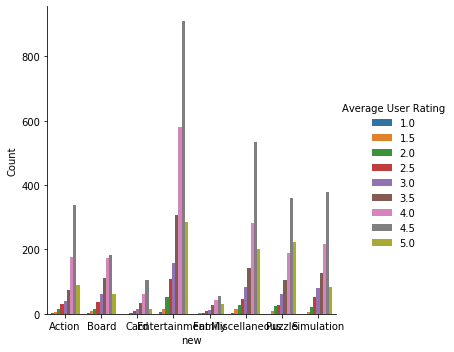

In [ ]:
#number of games with different user average rating under different genres
sns.catplot(x='new',y='Count',hue='Average User Rating',kind='bar',data=r)

Entertainment is the most significant Genre based on User Ratings.

In [ ]:
df1=pd.DataFrame()
df1['Genre']=m['new']
df1['User Rating']=m['Average User Rating']
df1['User Rating Count']=m['User Rating Count']
df1['Pricing']=m['Price']
df1

,Genre,User Rating,User Rating Count,Pricing
0,Puzzle,4.0,3553.0,2.99
1,Board,3.5,284.0,1.99
2,Board,3.0,8376.0,0.00
3,Puzzle,3.5,190394.0,0.00
4,Board,3.5,28.0,2.99
...,...,...,...,...
16950,Entertainment,3.0,6.0,0.00
16956,Entertainment,5.0,30.0,0.00
16962,Simulation,5.0,51.0,0.00
16967,Simulation,5.0,5.0,0.00


In [ ]:
df1=df1.sort_values(by=['Genre'])

In [ ]:
df1.to_csv('Edited.csv')

In [ ]:
Act=pd.read_csv(r'/content/gdrive/My Drive/Act.csv')
Board=pd.read_csv(r'/content/gdrive/My Drive/Board.csv')
Card=pd.read_csv(r'/content/gdrive/My Drive/Card.csv')
Puz=pd.read_csv(r'/content/gdrive/My Drive/Puz.csv')
Mis=pd.read_csv(r'/content/gdrive/My Drive/Mis.csv')
Sim=pd.read_csv(r'/content/gdrive/My Drive/Sim.csv')
Fam=pd.read_csv(r'/content/gdrive/My Drive/Fam.csv')
Ent=pd.read_csv(r'/content/gdrive/My Drive/Ent.csv')

In [ ]:
Act=pd.DataFrame(Act)
Act

,Unnamed: 0,Genre,User Rating,User Rating Count,Pricing
0,12863,Action,5.0,6,0.00
1,7297,Action,4.5,11,0.00
2,7303,Action,5.0,71126,0.00
3,12851,Action,4.0,338,0.00
4,7330,Action,5.0,5,0.00
...,...,...,...,...,...
763,11874,Action,4.0,10,0.00
764,11409,Action,4.0,627,0.00
765,16616,Action,5.0,5,0.00
766,9904,Action,3.0,28,0.00


In [ ]:
aw=Act.groupby(by=['User Rating','Pricing']).size()
aw=pd.DataFrame(aw)
aw=aw.rename(columns={0:'Count'})
aw.to_csv('table.csv')
aw=pd.read_csv(r'/content/table.csv')
aw=pd.DataFrame(aw)
aw

,User Rating,Pricing,Count
0,1.0,0.99,1
1,1.5,0.00,4
2,1.5,0.99,1
3,2.0,0.00,14
4,2.5,0.00,27
5,2.5,0.99,1
6,2.5,1.99,1
7,3.0,0.00,35
8,3.0,0.99,2
9,3.0,1.99,1


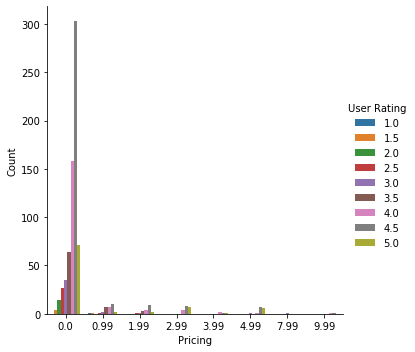

In [ ]:
#user rating and price trends in the genre Action
sns.catplot(x='Pricing',y='Count',hue='User Rating',kind='bar',data=aw)

In [ ]:
Mis=pd.DataFrame(Mis)
Mis


,Unnamed: 0,Genre,User Rating,User Rating Count,Pricing
0,10664,Miscellaneous,5.0,9,0.0
1,15737,Miscellaneous,4.0,87,0.0
2,10652,Miscellaneous,4.5,49,0.0
3,9577,Miscellaneous,4.0,277,0.0
4,15743,Miscellaneous,5.0,36,0.0
...,...,...,...,...,...
1329,1959,Miscellaneous,4.5,15,0.0
1330,11600,Miscellaneous,4.5,8,0.0
1331,1968,Miscellaneous,4.0,43,0.0
1332,13102,Miscellaneous,3.5,32,0.0


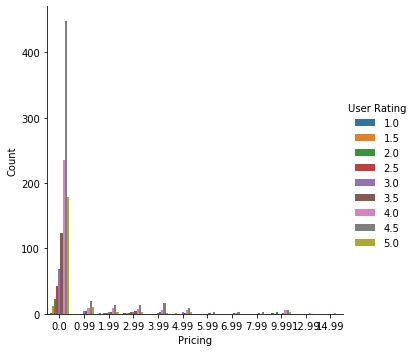

In [ ]:
aw=Mis.groupby(by=['User Rating','Pricing']).size()
aw=pd.DataFrame(aw)
aw=aw.rename(columns={0:'Count'})
aw.to_csv('table.csv')
aw=pd.read_csv(r'/content/table.csv')
aw=pd.DataFrame(aw)
#user rating and price trends in the genre Puzzle
sns.catplot(x='Pricing',y='Count',hue='User Rating',kind='bar',data=aw)

In [ ]:
Puz=pd.DataFrame(Puz)
Puz

,Unnamed: 0,Genre,User Rating,User Rating Count,Pricing
0,11545,Puzzle,4.5,3554,0.00
1,11574,Puzzle,4.5,11,0.99
2,11544,Puzzle,4.5,22,0.00
3,16826,Puzzle,2.5,19,0.00
4,16808,Puzzle,5.0,10,0.00
...,...,...,...,...,...
994,8161,Puzzle,4.5,64,0.00
995,8109,Puzzle,4.5,52,0.00
996,8165,Puzzle,5.0,8,0.00
997,8076,Puzzle,4.0,5,0.00


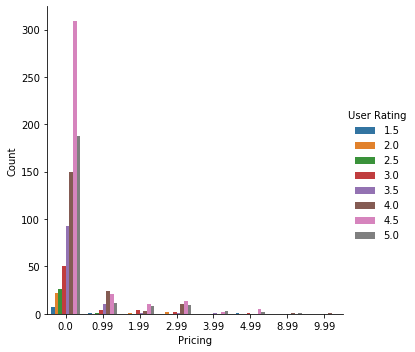

In [ ]:
aw=Puz.groupby(by=['User Rating','Pricing']).size()
aw=pd.DataFrame(aw)
aw=aw.rename(columns={0:'Count'})
aw.to_csv('table.csv')
aw=pd.read_csv(r'/content/table.csv')
aw=pd.DataFrame(aw)
#user rating and price trends in the genre Puzzle
sns.catplot(x='Pricing',y='Count',hue='User Rating',kind='bar',data=aw)

In [ ]:
Card=pd.DataFrame(Card)
Card

,Unnamed: 0,Genre,User Rating,User Rating Count,Pricing
0,15259,Card,3.0,7,0.00
1,9046,Card,5.0,51,9.99
2,11649,Card,4.5,169,0.00
3,2323,Card,2.5,37,2.99
4,2071,Card,4.5,227,0.00
...,...,...,...,...,...
237,952,Card,4.0,47,0.00
238,10209,Card,4.5,371,0.00
239,1669,Card,4.0,529,0.00
240,239,Card,4.5,10311,0.00


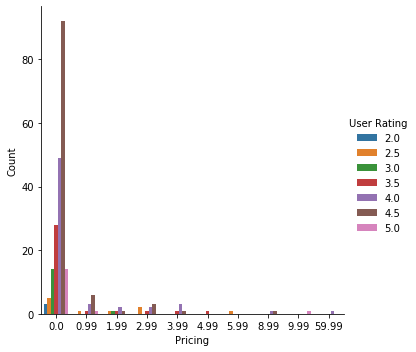

In [ ]:
aw=Card.groupby(by=['User Rating','Pricing']).size()
aw=pd.DataFrame(aw)
aw=aw.rename(columns={0:'Count'})
aw.to_csv('table.csv')
aw=pd.read_csv(r'/content/table.csv')
aw=pd.DataFrame(aw)
#user rating and price trends in the genre Puzzle
sns.catplot(x='Pricing',y='Count',hue='User Rating',kind='bar',data=aw)

In [ ]:
Board=pd.DataFrame(Board)
Board

,Unnamed: 0,Genre,User Rating,User Rating Count,Pricing
0,3047,Board,3.5,18,0.00
1,12787,Board,4.5,2121,0.00
2,115,Board,3.0,847,0.99
3,15456,Board,3.5,29,0.00
4,445,Board,3.5,113,0.00
...,...,...,...,...,...
645,8248,Board,4.5,102,0.00
646,537,Board,4.5,14,0.00
647,1,Board,3.5,284,1.99
648,14850,Board,3.5,12,0.00


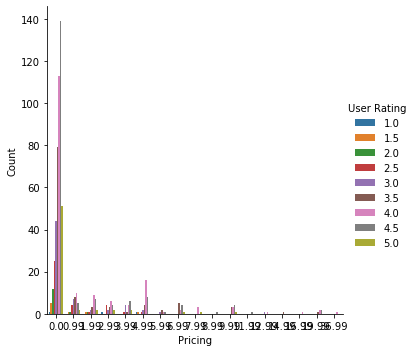

In [ ]:
aw=Board.groupby(by=['User Rating','Pricing']).size()
aw=pd.DataFrame(aw)
aw=aw.rename(columns={0:'Count'})
aw.to_csv('table.csv')
aw=pd.read_csv(r'/content/table.csv')
aw=pd.DataFrame(aw)
#user rating and price trends in the genre Puzzle
sns.catplot(x='Pricing',y='Count',hue='User Rating',kind='bar',data=aw)

In [ ]:
Sim=pd.DataFrame(Sim)
Sim

,Unnamed: 0,Genre,User Rating,User Rating Count,Pricing
0,1228,Simulation,3.0,12,0.00
1,893,Simulation,4.0,499,0.00
2,16548,Simulation,5.0,80,1.99
3,307,Simulation,3.0,705,0.00
4,16569,Simulation,4.5,105,0.99
...,...,...,...,...,...
961,5259,Simulation,4.5,21892,0.00
962,5315,Simulation,4.5,2226,0.00
963,5319,Simulation,3.5,47,0.00
964,5225,Simulation,4.0,110,0.00


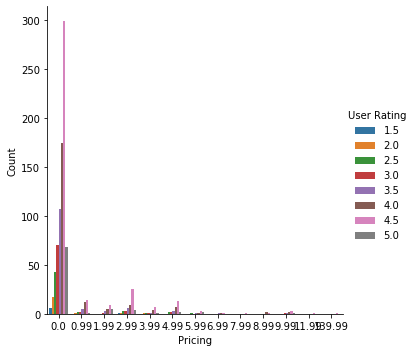

In [ ]:
aw=Sim.groupby(by=['User Rating','Pricing']).size()
aw=pd.DataFrame(aw)
aw=aw.rename(columns={0:'Count'})
aw.to_csv('table.csv')
aw=pd.read_csv(r'/content/table.csv')
aw=pd.DataFrame(aw)
#user rating and price trends in the genre Puzzle
sns.catplot(x='Pricing',y='Count',hue='User Rating',kind='bar',data=aw)

In [ ]:
Fam=pd.DataFrame(Fam)
Fam

,Unnamed: 0,Genre,User Rating,User Rating Count,Pricing
0,2019,Family,4.0,12,0.00
1,10425,Family,5.0,5,0.00
2,706,Family,4.0,1975,0.00
3,2305,Family,4.0,25,1.99
4,5840,Family,2.5,7,0.00
...,...,...,...,...,...
174,161,Family,3.0,46861,0.99
175,3414,Family,4.0,30,0.00
176,9946,Family,4.5,47,0.00
177,10097,Family,2.0,89,0.00


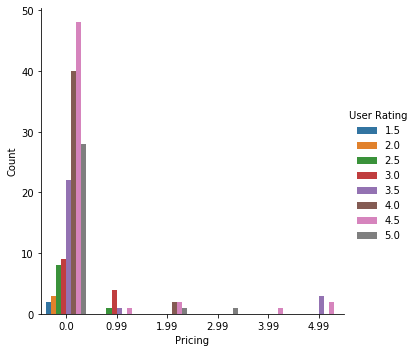

In [ ]:
aw=Fam.groupby(by=['User Rating','Pricing']).size()
aw=pd.DataFrame(aw)
aw=aw.rename(columns={0:'Count'})
aw.to_csv('table.csv')
aw=pd.read_csv(r'/content/table.csv')
aw=pd.DataFrame(aw)
#user rating and price trends in the genre Puzzle
sns.catplot(x='Pricing',y='Count',hue='User Rating',kind='bar',data=aw)

In [ ]:
Ent=pd.DataFrame(Ent)
Ent

,Unnamed: 0,Genre,User Rating,User Rating Count,Pricing
0,5157,Entertainment,3.5,40,0.0
1,10954,Entertainment,4.5,1425,0.0
2,13638,Entertainment,3.0,44,0.0
3,5515,Entertainment,5.0,20,0.0
4,13636,Entertainment,5.0,46,0.0
...,...,...,...,...,...
2418,2894,Entertainment,3.5,5,0.0
2419,2899,Entertainment,3.0,46,0.0
2420,2897,Entertainment,4.5,29,0.0
2421,14838,Entertainment,2.0,22,0.0


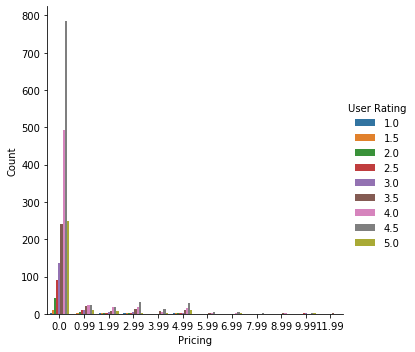

In [ ]:
aw=Ent.groupby(by=['User Rating','Pricing']).size()
aw=pd.DataFrame(aw)
aw=aw.rename(columns={0:'Count'})
aw.to_csv('table.csv')
aw=pd.read_csv(r'/content/table.csv')
aw=pd.DataFrame(aw)
#user rating and price trends in the genre Puzzle
sns.catplot(x='Pricing',y='Count',hue='User Rating',kind='bar',data=aw)

Inference:
It is evident from all the above 8 graphs that the average user rating is here when there is no pricing on the app(when it is available free).

In [ ]:
#df.loc[df['X'] == 1, 'Y'].sum()
count=pd.DataFrame()
u=[]
i=1.0
while i<=5:
  u.append(i)
  i+=0.5
print(u) 

fields={'Puzzle':Puz, 'Board':Board, 'Entertainment':Ent, 'Miscellaneous':Mis, 'Card':Card,'Simulation':Sim, 'Action':Act, 'Family':Fam}
for i in fields:
  for j in u:
    s=fields[i].loc[fields[i]['User Rating']==j,'User Rating Count'].sum()
    count=count.append({'Genre':i,'User Rating':j,'User Count':s},ignore_index=True)

count


[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


,Genre,User Count,User Rating
0,Puzzle,0.0,1.0
1,Puzzle,1102.0,1.5
2,Puzzle,2239.0,2.0
3,Puzzle,11237.0,2.5
4,Puzzle,24771.0,3.0
...,...,...,...
67,Family,132497.0,3.0
68,Family,2769.0,3.5
69,Family,102381.0,4.0
70,Family,110771.0,4.5


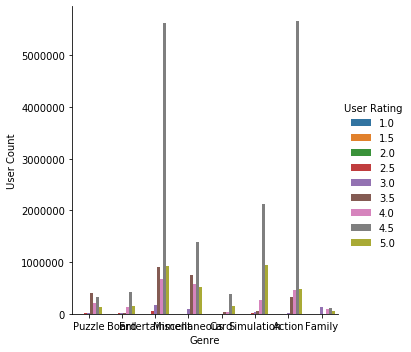

In [ ]:
#number of user ratings corresponding to every average rating under different genres
sns.catplot(x='Genre',y='User Count',hue='User Rating',kind='bar',data=count)

Inference:
Entertainment and Action has the highest User Ratings with many users rating the app.Hence they are the most significant Genres.
